In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle


In [72]:

# Path to your file
avg_locs_neural_path = '/om2/group/yanglab/zfa/avg_spatial_locs/neural_B_avg_spatial_positions.pickle'
avg_locs_glial_path = '/om2/group/yanglab/zfa/avg_spatial_locs/glial_B_avg_spatial_positions.pickle'

# Open the file in read-binary mode and load the data
with open(avg_locs_neural_path, 'rb') as file:
    avg_locs_neural = pickle.load(file)

# Open the file in read-binary mode and load the data
with open(avg_locs_glial_path, 'rb') as file:
    avg_locs_glial = pickle.load(file)

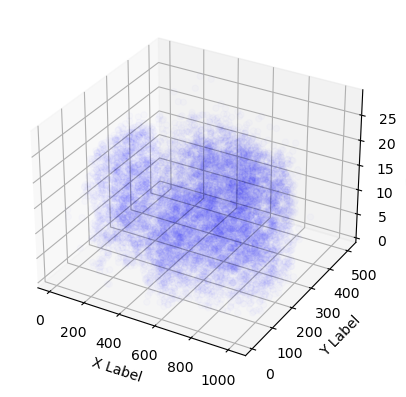

In [73]:


# Function to plot k random samples in 3D
def plot_random_samples(data, k):
    # Randomly sample k indices
    random_indices = np.random.choice(data.shape[0], k, replace=False)

    # Extract the sampled points
    sampled_points = data[random_indices]

    # 3D Scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(sampled_points[:, 0], sampled_points[:, 1], sampled_points[:, 2], c='b', marker='o',alpha = 0.01)

    # Set labels for axes
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    # Display the plot
    plt.show()

# Set the value of k (number of samples to plot)
k = int(1e4)# You can modify this value as needed

# Call the function to plot the random samples
plot_random_samples(avg_locs_glial, k)


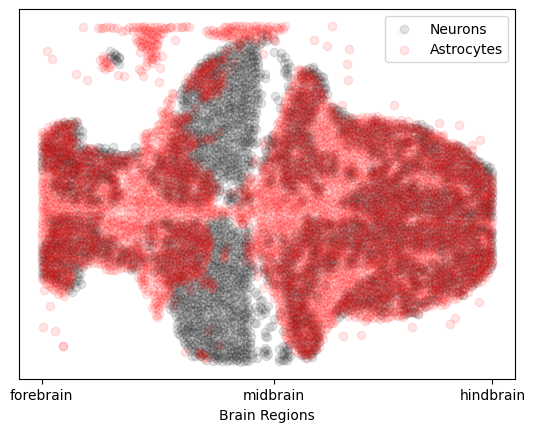

In [85]:
z_coor = 15

z_slice_neural = avg_locs_neural[avg_locs_neural[:, 2] == z_coor]
z_slice_glial = avg_locs_glial[avg_locs_glial[:, 2] == z_coor]

plt.scatter(z_slice_neural[:,0], z_slice_neural[:,1], color='k', alpha=0.1, label='Neurons')
plt.scatter(z_slice_glial[:,0], z_slice_glial[:,1], color='r', alpha=0.1, label='Astrocytes')

# Add a legend
plt.legend()

# Define positions and labels for the x-axis
x_positions = [min(z_slice_neural[:, 0]), np.mean(z_slice_neural[:, 0]), max(z_slice_neural[:, 0])]
x_labels = ['forebrain', 'midbrain', 'hindbrain']


# Set the custom x-ticks
plt.xticks(x_positions, x_labels)
plt.yticks([])

# Set labels for the axes
plt.xlabel('Brain Regions')

# Display the plot
plt.show()
